# DiploDatos Kaggle Competition

Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# diabetes_prediction_dataset_train-labeled.csv
url = 'https://drive.google.com/uc?id=14ZMzlr7BT_ldFO8RHk9fDfbd0La9YuIH'
output = 'diabetes_prediction_dataset_train-labeled.csv'
gdown.download(url, output, quiet=False)


# diabetes_prediction_dataset_test.csv
url = 'https://drive.google.com/uc?id=1I5VE1x9rMz_zQacNm3JvXNZlpFtk7TEa'

output = 'diabetes_prediction_dataset_test.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=14ZMzlr7BT_ldFO8RHk9fDfbd0La9YuIH
To: /content/diabetes_prediction_dataset_train-labeled.csv
100%|██████████| 4.18M/4.18M [00:00<00:00, 22.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1I5VE1x9rMz_zQacNm3JvXNZlpFtk7TEa
To: /content/diabetes_prediction_dataset_test.csv
100%|██████████| 215k/215k [00:00<00:00, 3.30MB/s]


'diabetes_prediction_dataset_test.csv'

## Leer el dataset

### Train

Cargamos los datos de entrenamiento que vamos a utilizar para generar nuestro modelo.

In [ ]:
train_df = pd.read_csv('diabetes_prediction_dataset_train-labeled.csv')
print(train_df.shape)
print(train_df.describe())
train_df

(95000, 10)
             patient           age  hypertension  heart_disease           bmi  \
count   95000.000000  95000.000000  95000.000000   95000.000000  95000.000000   
mean    50016.501389     41.935269      0.075074       0.039463     27.320879   
std     28868.357071     22.514788      0.263512       0.194695      6.626335   
min         1.000000      0.080000      0.000000       0.000000     10.010000   
25%     25021.750000     24.000000      0.000000       0.000000     23.650000   
50%     50024.000000     43.000000      0.000000       0.000000     27.320000   
75%     75024.250000     60.000000      0.000000       0.000000     29.580000   
max    100000.000000     80.000000      1.000000       1.000000     95.690000   

        HbA1c_level  blood_glucose_level      diabetes  
count  95000.000000         95000.000000  95000.000000  
mean       5.527659           138.070537      0.085074  
std        1.070261            40.739962      0.278993  
min        3.500000           

,patient,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,20432,Male,4.0,0,0,never,19.28,3.5,155,0
1,49682,Female,50.0,0,0,former,27.32,5.7,159,0
2,73886,Female,43.0,0,0,never,21.54,4.5,145,0
3,53144,Male,64.0,0,0,current,28.22,6.0,130,0
4,98507,Male,10.0,0,0,No Info,15.46,6.1,140,0
...,...,...,...,...,...,...,...,...,...,...
94995,81090,Female,56.0,0,0,never,22.30,6.2,158,0
94996,90924,Female,24.0,0,0,never,22.50,6.1,126,0
94997,64600,Female,32.0,0,0,never,24.92,6.6,145,0
94998,96132,Female,21.0,0,0,current,20.59,4.5,155,0


In [ ]:
train_df.head()

,patient,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,20432,Male,4.0,0,0,never,19.28,3.5,155,0
1,49682,Female,50.0,0,0,former,27.32,5.7,159,0
2,73886,Female,43.0,0,0,never,21.54,4.5,145,0
3,53144,Male,64.0,0,0,current,28.22,6.0,130,0
4,98507,Male,10.0,0,0,No Info,15.46,6.1,140,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient              95000 non-null  int64  
 1   gender               95000 non-null  object 
 2   age                  95000 non-null  float64
 3   hypertension         95000 non-null  int64  
 4   heart_disease        95000 non-null  int64  
 5   smoking_history      95000 non-null  object 
 6   bmi                  95000 non-null  float64
 7   HbA1c_level          95000 non-null  float64
 8   blood_glucose_level  95000 non-null  int64  
 9   diabetes             95000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 7.2+ MB


La columna ***`diabetes`*** es la columna que debemos predecir. En el dataset de Test esta columna tiene valores nulos.

### Test

Cargamos los datos de test. Estos datos son los que van a utilizar para predecir si las personas tienen diabetes y generar alrchivo `submision.csv` para utilizar en la competencia de Kaggle.

In [ ]:
test_df = pd.read_csv('diabetes_prediction_dataset_test.csv')
print(test_df.shape)
print(test_df.describe())

(5000, 10)
            patient          age  hypertension  heart_disease          bmi  \
count   5000.000000  5000.000000   5000.000000    5000.000000  5000.000000   
mean   49696.473600    40.947016      0.070600       0.038600    27.318644   
std    28855.568156    22.537466      0.256181       0.192659     6.832943   
min        7.000000     0.160000      0.000000       0.000000    10.620000   
25%    24720.750000    23.000000      0.000000       0.000000    23.410000   
50%    49522.500000    41.000000      0.000000       0.000000    27.320000   
75%    74686.000000    59.000000      0.000000       0.000000    29.632500   
max    99970.000000    80.000000      1.000000       1.000000    88.760000   

       HbA1c_level  blood_glucose_level  diabetes  
count  5000.000000          5000.000000       0.0  
mean      5.524620           137.821000       NaN  
std       1.078559            40.101933       NaN  
min       3.500000            80.000000       NaN  
25%       4.800000        

In [ ]:
test_df.head()

,patient,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,49267,Male,53.0,0,0,never,31.99,4.5,126,NaN
1,82280,Female,22.0,0,0,never,25.96,6.6,130,NaN
2,33216,Female,37.0,0,0,never,22.24,6.2,126,NaN
3,94551,Female,29.0,0,0,not current,31.01,5.0,80,NaN
4,43760,Male,30.0,0,0,ever,28.66,6.6,100,NaN


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient              5000 non-null   int64  
 1   gender               5000 non-null   object 
 2   age                  5000 non-null   float64
 3   hypertension         5000 non-null   int64  
 4   heart_disease        5000 non-null   int64  
 5   smoking_history      5000 non-null   object 
 6   bmi                  5000 non-null   float64
 7   HbA1c_level          5000 non-null   float64
 8   blood_glucose_level  5000 non-null   int64  
 9   diabetes             0 non-null      float64
dtypes: float64(4), int64(4), object(2)
memory usage: 390.8+ KB


## Analisis de los datos

Como podemos ver en el proximo grafico, no hay datos faltantes en ninguna de las columnas

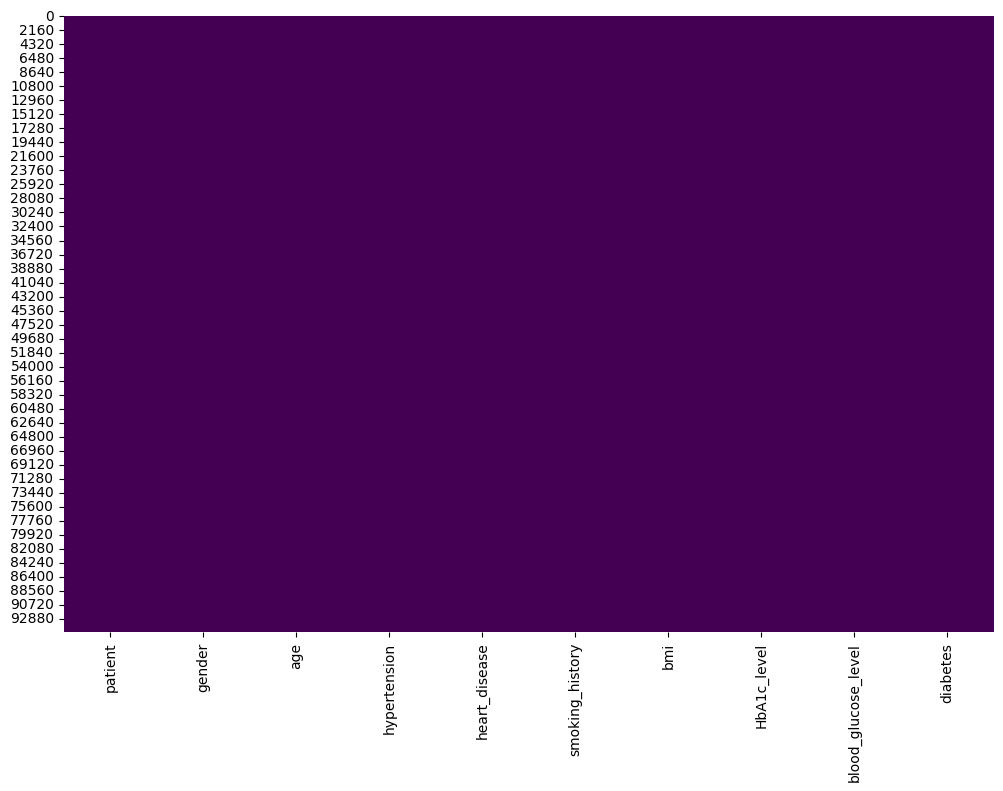

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))  # Optional: changes the figure size
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.show()

Ahora tratamos de discernir cuáles son las variables que, a priori, pueden llegar a tener mayor poder explicativo. Para eso hacemos un análisis de correlación. Como la variable dependiente es binaria, usamos el 'Point biserial correlation', que es una adaptación del coeficiente de correlación de Pearson para vairibles de ese tipo. Se interpreta de la misma forma.

In [ ]:
from scipy import stats

# Creo un df nuevo con las variables categóricas factorizadas para poder
# calcular el estadístico.

train_df_2 = train_df.copy()
label_cols = ["gender", "smoking_history"]

for col in label_cols:
    train_df_2[col] = train_df_2[col].astype(str)
    train_df_2[col] = LabelEncoder().fit_transform(train_df_2[col])

print("Point biserial correlation:\n")
print("- gender:",stats.pointbiserialr(train_df_2.gender, pd.to_numeric(train_df_2.diabetes)))
print("- age:",stats.pointbiserialr(train_df.age, pd.to_numeric(train_df.diabetes)))
print("- hypertension:",stats.pointbiserialr(train_df.hypertension, pd.to_numeric(train_df.diabetes)))
print("- heart_disease:",stats.pointbiserialr(train_df.heart_disease, pd.to_numeric(train_df.diabetes)))
print("- smoking_history:",stats.pointbiserialr(train_df_2.smoking_history, pd.to_numeric(train_df_2.diabetes)))
print("- bmi:",stats.pointbiserialr(train_df.bmi, pd.to_numeric(train_df.diabetes)))
print("- HbA1c_level:",stats.pointbiserialr(train_df.HbA1c_level, pd.to_numeric(train_df.diabetes)))
print("- blood_glucose_level:",stats.pointbiserialr(train_df.blood_glucose_level, pd.to_numeric(train_df.diabetes)))

Point biserial correlation:

- gender: SignificanceResult(statistic=0.03768961992458708, pvalue=3.2348733666994032e-31)
- age: SignificanceResult(statistic=0.2578175287011171, pvalue=0.0)
- hypertension: SignificanceResult(statistic=0.19719798688645446, pvalue=0.0)
- heart_disease: SignificanceResult(statistic=0.1724850509688386, pvalue=0.0)
- smoking_history: SignificanceResult(statistic=0.09357651094940188, pvalue=1.0248069508379027e-183)
- bmi: SignificanceResult(statistic=0.21412570851703588, pvalue=0.0)
- HbA1c_level: SignificanceResult(statistic=0.39985430887713613, pvalue=0.0)
- blood_glucose_level: SignificanceResult(statistic=0.42065023300465554, pvalue=0.0)


En base los resultados, queda claro que las variables que más correlacionadas están con la variable dependiente son blood_glucose_level (0,42), HbA1c_level (0,40), age (0,26) y bmi (0,21).

Ahora queremos determinar si existe correlación entre los features. Una fuerte correlación podría derivar en problemas de estimación. Nos servimos de la matriz de correlación.

In [ ]:
train_df_2.drop('diabetes',axis=1).corr()

,patient,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
patient,1.000000,0.000974,0.000743,0.000175,0.003549,-0.004121,-0.002815,0.001126,0.003965
gender,0.000974,1.000000,-0.030810,0.013943,0.077194,-0.078126,-0.023567,0.020555,0.016333
age,0.000743,-0.030810,1.000000,0.250869,0.233136,0.228769,0.337423,0.101690,0.110453
hypertension,0.000175,0.013943,0.250869,1.000000,0.120961,0.093416,0.147341,0.080947,0.084123
heart_disease,0.003549,0.077194,0.233136,0.120961,1.000000,0.026549,0.060402,0.068632,0.069277
smoking_history,-0.004121,-0.078126,0.228769,0.093416,0.026549,1.000000,0.179191,0.036864,0.040213
bmi,-0.002815,-0.023567,0.337423,0.147341,0.060402,0.179191,1.000000,0.083378,0.092051
HbA1c_level,0.001126,0.020555,0.101690,0.080947,0.068632,0.036864,0.083378,1.000000,0.167104
blood_glucose_level,0.003965,0.016333,0.110453,0.084123,0.069277,0.040213,0.092051,0.167104,1.000000


La variable que pareciera ser problemástica es 'age', aunque las correlaciones con el resto de las variables no es demasiado fuerte (0,34 en el caso más alto, de bmi).

Veamos ahora la distribución de las columnas

array([[<Axes: title={'center': 'patient'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>],
       [<Axes: title={'center': 'blood_glucose_level'}>,
        <Axes: title={'center': 'diabetes'}>, <Axes: >]], dtype=object)

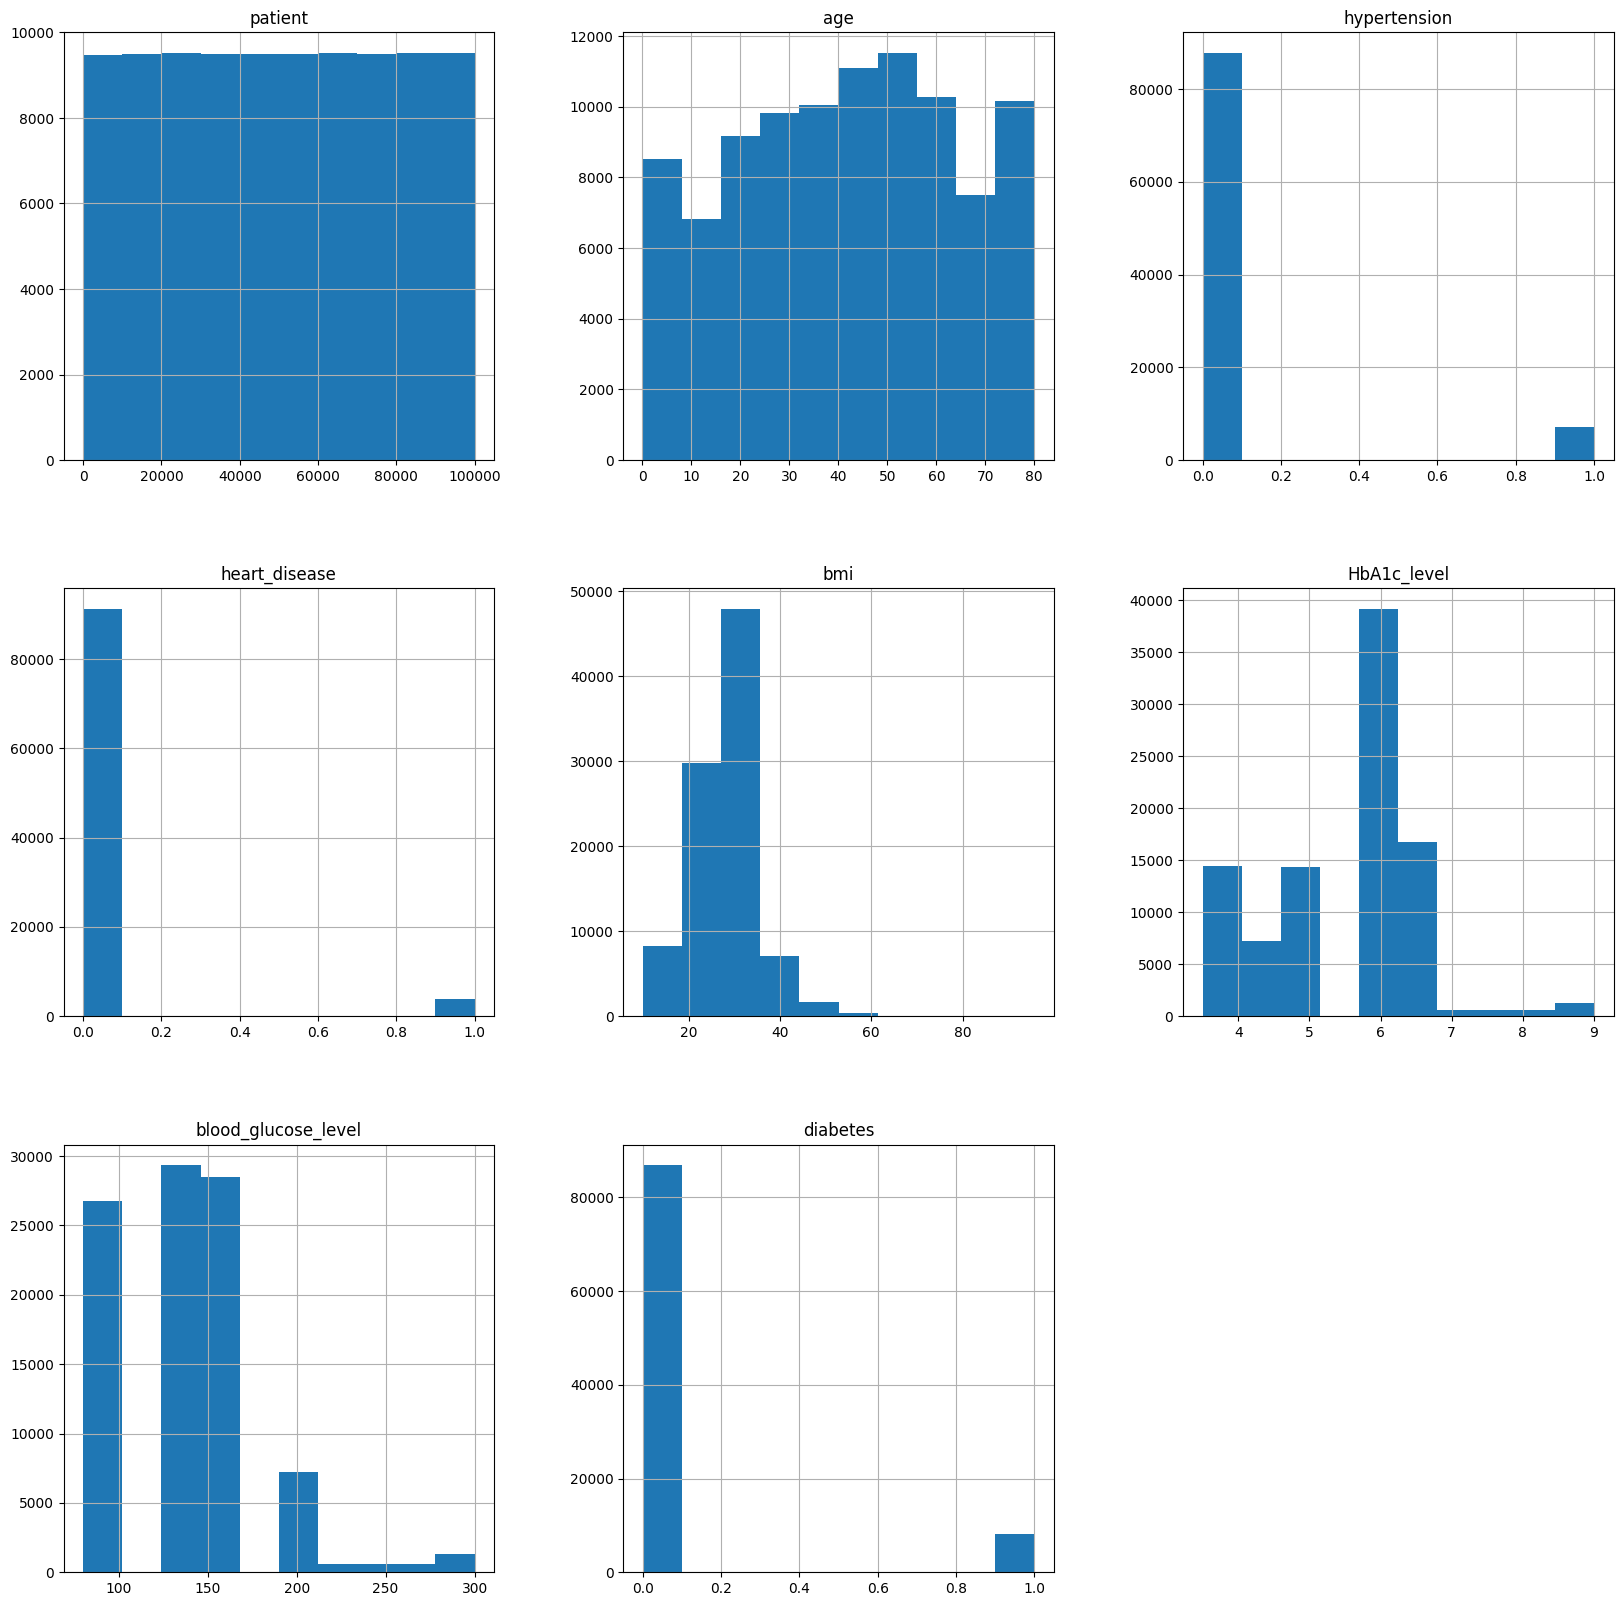

In [ ]:
train_df.hist(figsize = (20,20))

Veamos ahora como es la distribución de las columas para los pacientes que sí tienen diabetes

array([[<Axes: title={'center': 'patient'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>],
       [<Axes: title={'center': 'blood_glucose_level'}>,
        <Axes: title={'center': 'diabetes'}>, <Axes: >]], dtype=object)

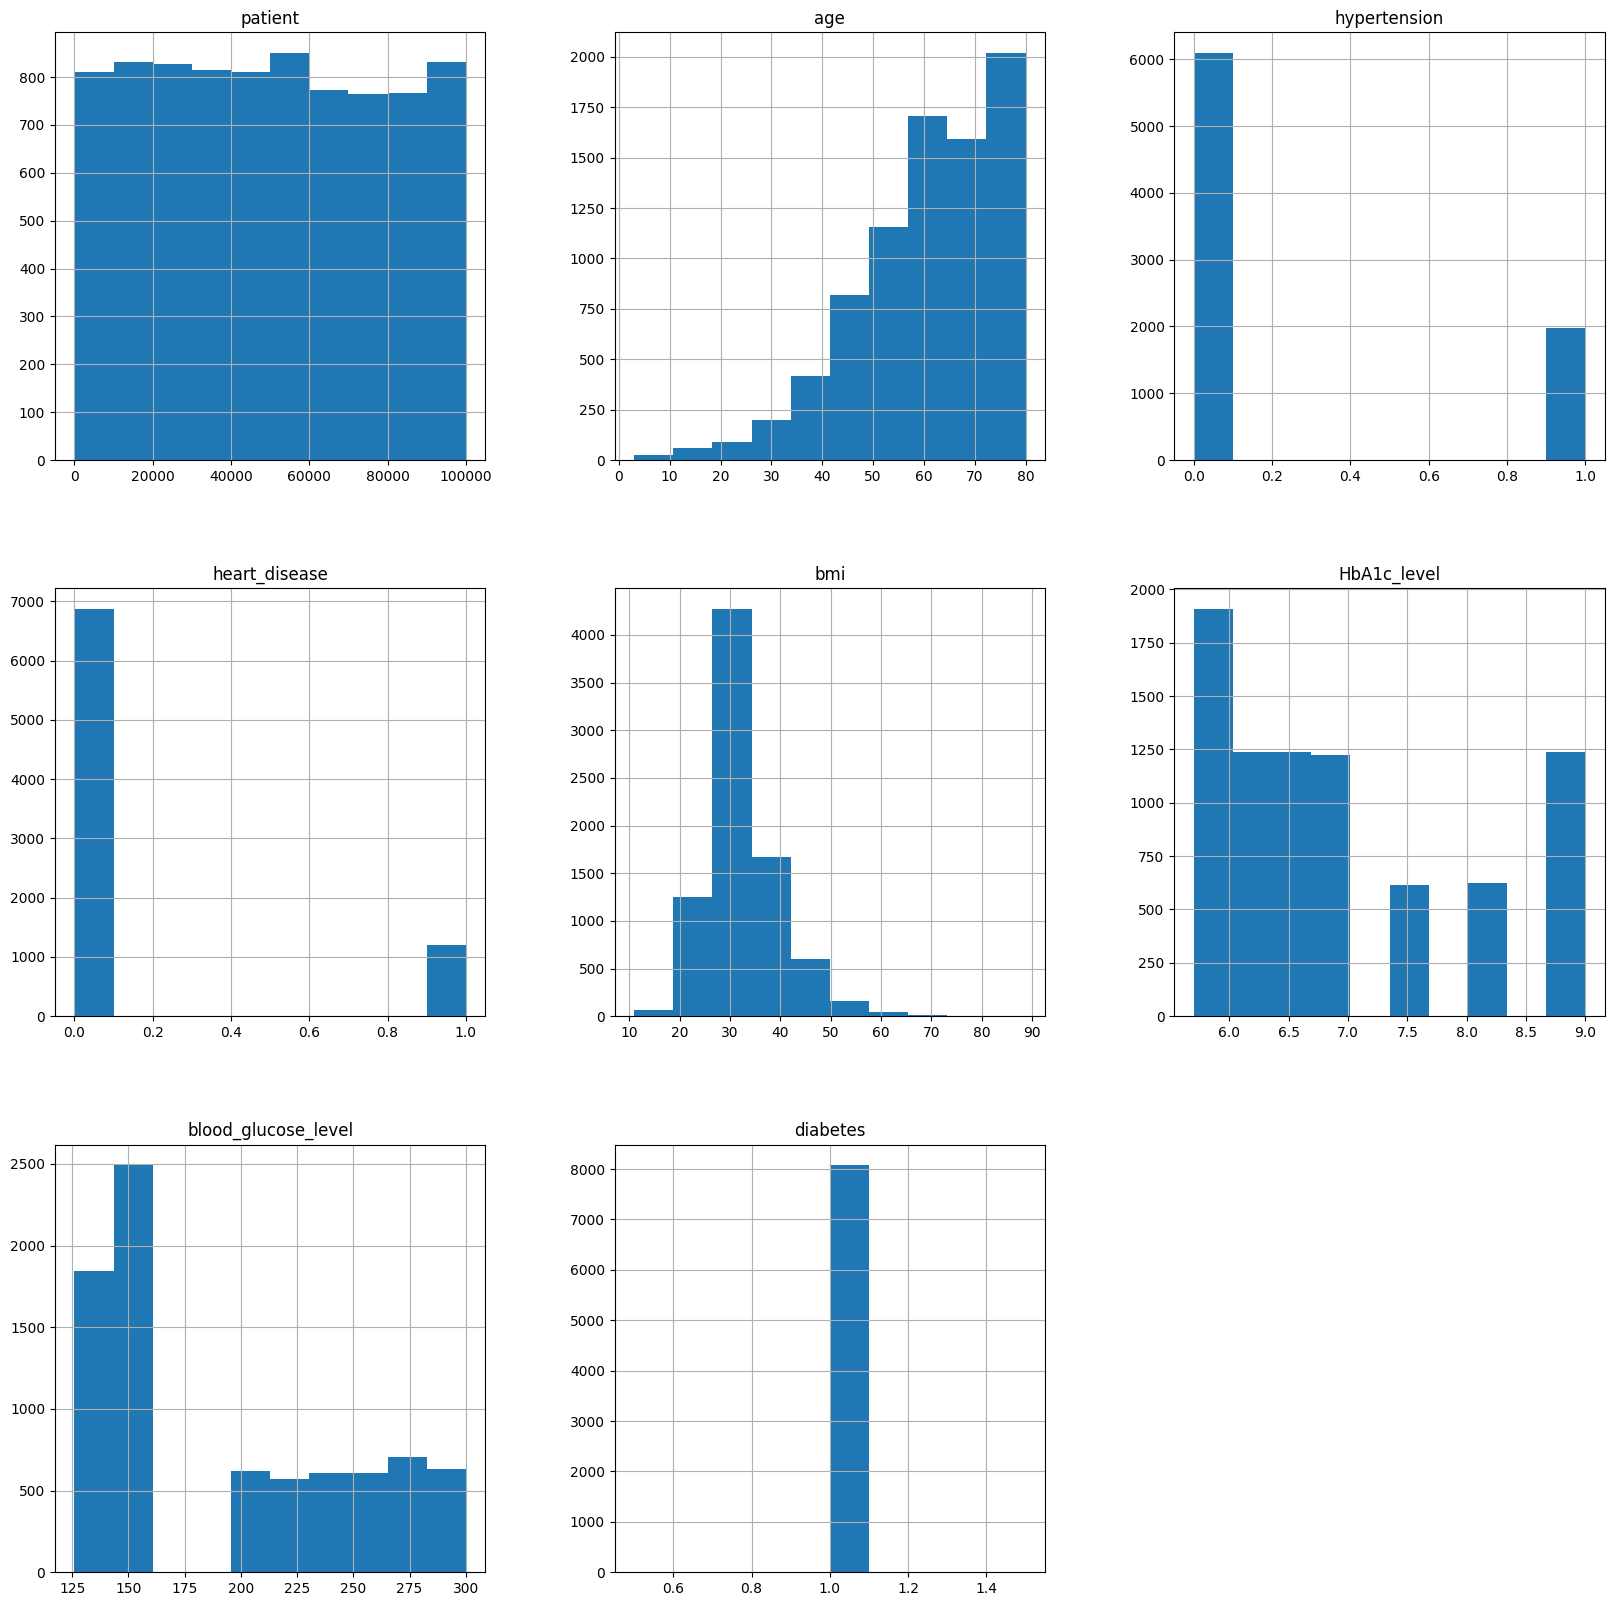

In [ ]:
train_df[train_df['diabetes'] == 1].hist(figsize = (20,20))

Necesitamos contruir nuestros conjuntos de datos para realizar los entrenamientos:

In [ ]:
y = train_df.diabetes
X = train_df.drop('diabetes',axis=1)
X

,patient,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,20432,Male,4.0,0,0,never,19.28,3.5,155
1,49682,Female,50.0,0,0,former,27.32,5.7,159
2,73886,Female,43.0,0,0,never,21.54,4.5,145
3,53144,Male,64.0,0,0,current,28.22,6.0,130
4,98507,Male,10.0,0,0,No Info,15.46,6.1,140
...,...,...,...,...,...,...,...,...,...
94995,81090,Female,56.0,0,0,never,22.30,6.2,158
94996,90924,Female,24.0,0,0,never,22.50,6.1,126
94997,64600,Female,32.0,0,0,never,24.92,6.6,145
94998,96132,Female,21.0,0,0,current,20.59,4.5,155


Vamos a separar la columna con los Id de los pacientes en una sola variable:

In [ ]:
patientId = X.patient
X.drop('patient',axis=1,inplace=True)

Necesitamos transformar las variables que son categoricas a númericas, como por ejemplo **gender** y **smoking_history**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(X[['gender', 'smoking_history']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['gender', 'smoking_history']))
X.drop(['gender', 'smoking_history'], axis=1,inplace=True)
X = pd.concat([X, encoded_df], axis=1)
X

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,4.0,0,0,19.28,3.5,155,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50.0,0,0,27.32,5.7,159,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,43.0,0,0,21.54,4.5,145,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,64.0,0,0,28.22,6.0,130,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,10.0,0,0,15.46,6.1,140,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,56.0,0,0,22.30,6.2,158,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
94996,24.0,0,0,22.50,6.1,126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
94997,32.0,0,0,24.92,6.6,145,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
94998,21.0,0,0,20.59,4.5,155,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Necesitamos también estandarizar las variables:

In [ ]:
x_names = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=x_names)
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,-1.684913,-0.284899,-0.202693,-1.213479,-1.894556,0.415552,-1.186973,1.187385,-0.012979,-0.745859,-0.319932,-0.2039,-0.321728,1.358399,-0.262612
1,0.358199,-0.284899,-0.202693,-0.000133,0.161028,0.513736,0.842479,-0.842187,-0.012979,-0.745859,-0.319932,-0.2039,3.108212,-0.736161,-0.262612
2,0.047291,-0.284899,-0.202693,-0.872414,-0.960200,0.170091,0.842479,-0.842187,-0.012979,-0.745859,-0.319932,-0.2039,-0.321728,1.358399,-0.262612
3,0.980016,-0.284899,-0.202693,0.135690,0.441335,-0.198100,-1.186973,1.187385,-0.012979,-0.745859,3.125661,-0.2039,-0.321728,-0.736161,-0.262612
4,-1.418420,-0.284899,-0.202693,-1.789970,0.534771,0.047361,-1.186973,1.187385,-0.012979,1.340736,-0.319932,-0.2039,-0.321728,-0.736161,-0.262612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,0.624692,-0.284899,-0.202693,-0.757720,0.628206,0.489190,0.842479,-0.842187,-0.012979,-0.745859,-0.319932,-0.2039,-0.321728,1.358399,-0.262612
94996,-0.796604,-0.284899,-0.202693,-0.727537,0.534771,-0.296284,0.842479,-0.842187,-0.012979,-0.745859,-0.319932,-0.2039,-0.321728,1.358399,-0.262612
94997,-0.441280,-0.284899,-0.202693,-0.362326,1.001949,0.170091,0.842479,-0.842187,-0.012979,-0.745859,-0.319932,-0.2039,-0.321728,1.358399,-0.262612
94998,-0.929850,-0.284899,-0.202693,-1.015782,-0.960200,0.415552,0.842479,-0.842187,-0.012979,-0.745859,3.125661,-0.2039,-0.321728,-0.736161,-0.262612


A partir de los datos en las variables `X` e `y` separamos en train y en test:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

### Planteo de modelos
Tienen que elegir los 2 mejores modelos así que prueben con varios.

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold, LeaveOneOut, LeavePOut
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


clfs =  [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    MLPClassifier(),
    XGBClassifier(),
    LinearSVC(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    HistGradientBoostingClassifier()
]

trained_models = []
accuracy_models = []
for clf in clfs:
    name = clf.__class__.__name__
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    test_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, test_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    trained_models.append(clf)
    accuracy_models.append(accuracy)

DecisionTreeClassifier
Accuracy train DecisionTreeClassifier: 99.92%
Accuracy test DecisionTreeClassifier: 94.98%
RandomForestClassifier
Accuracy train RandomForestClassifier: 99.92%
Accuracy test RandomForestClassifier: 97.09%
LogisticRegression
Accuracy train LogisticRegression: 95.97%
Accuracy test LogisticRegression: 96.25%
MLPClassifier
Accuracy train MLPClassifier: 97.22%
Accuracy test MLPClassifier: 97.34%
XGBClassifier
Accuracy train XGBClassifier: 97.61%
Accuracy test XGBClassifier: 97.28%
LinearSVC


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy train LinearSVC: 96.02%
Accuracy test LinearSVC: 96.22%
AdaBoostClassifier
Accuracy train AdaBoostClassifier: 97.16%
Accuracy test AdaBoostClassifier: 97.37%
GradientBoostingClassifier
Accuracy train GradientBoostingClassifier: 97.20%
Accuracy test GradientBoostingClassifier: 97.37%
HistGradientBoostingClassifier
Accuracy train HistGradientBoostingClassifier: 97.31%
Accuracy test HistGradientBoostingClassifier: 97.33%


In [ ]:
model_names = [model.__class__.__name__ for model in trained_models]

In [ ]:
pd.DataFrame(zip(model_names, accuracy_models), columns=['name', 'accuracy']).sort_values(by='accuracy', ascending=False)

,name,accuracy
6,AdaBoostClassifier,0.973737
7,GradientBoostingClassifier,0.973684
3,MLPClassifier,0.973421
8,HistGradientBoostingClassifier,0.973316
4,XGBClassifier,0.972789
1,RandomForestClassifier,0.970895
2,LogisticRegression,0.962526
5,LinearSVC,0.962211
0,DecisionTreeClassifier,0.949789


Los modelos que mejor resultados dan en el dataset de entrenamiento son:

*   AdaBoostClassifier
*   GradientBoostingClassifier

por lo que vamos a tomar estos dos y tratar de encontrar una combinacion de hiperparametros que optimize la acurracy del modelo.

### Modelo base

El modelo base que debemos tratar de mejorar es un DecisionTreeClassifier con hiperparametros:
{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

Accuracy train Arbol de decisión: 97.14%
Accuracy test Arbol de decisión: 97.36%


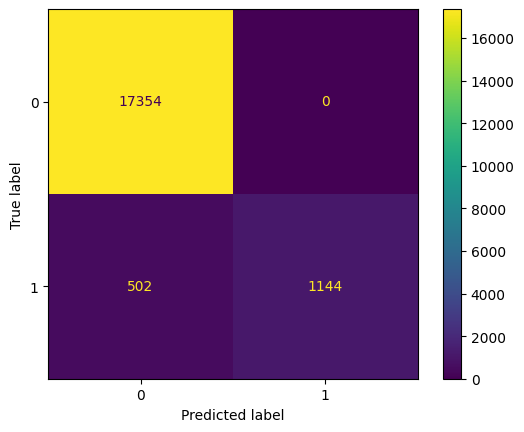

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       1.00      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.99      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



In [ ]:
best_params = {'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

clf = DecisionTreeClassifier(**best_params).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Arbol de decisión: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Arbol de decisión: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

## Tuning de Hiperparametros en modelos elegidos


In [ ]:
model = AdaBoostClassifier()

grid = {'n_estimators': [10, 50, 100, 500],
        'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
        }


grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)
print(grid_result.best_params_)
# Best params = {‘learning_rate’: 0.1, ‘n_estimators’: 500}

{'learning_rate': 0.1, 'n_estimators': 500}


Accuracy train AdaBoostClassifier: 97.17%
Accuracy test AdaBoostClassifier: 97.38%


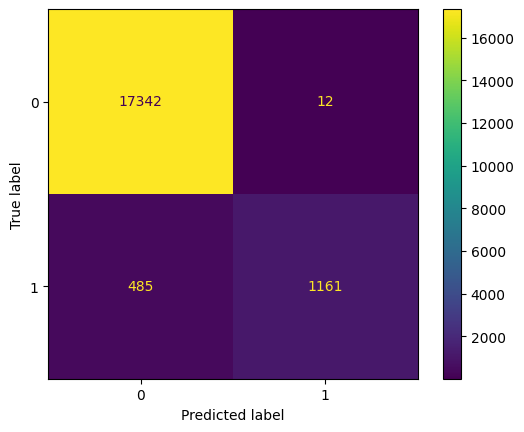

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.99      0.71      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#ada_boost = AdaBoostClassifier(**grid_result.best_params_).fit(x_train, y_train)
ada_boost = AdaBoostClassifier(**{'learning_rate': 0.1, 'n_estimators': 500}).fit(x_train, y_train)

train_predictions = ada_boost.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train AdaBoostClassifier: %.2f%%" % (accuracy * 100.0))

test_predictions = ada_boost.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test AdaBoostClassifier: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,ada_boost.predict(x_test)))

In [ ]:
ada_boost_default = AdaBoostClassifier().fit(x_train, y_train)

Podemos ver que tras la optimizacion de parametros el modelo que obtenemos tiene una performance de 97.38 % que es ligeramente mejor que el modelo con parametros por defecto 93.37 %.

A pesar de eso el modelo con parametros por defecto tiene una acurracy de 97.4 % en el dataset que vamos a usar para la competencia, mientras que el modelo con los mejores parametros nos da un 97.33 %.

En ambos casos la performance del modelo es mejor que la base que es de 97.26 %

In [ ]:
model = GradientBoostingClassifier()

grid = {"learning_rate": [0.01, 0.1, 0.001],
              "max_depth": [3,5, 8, 10],
              "n_estimators": [200, 500, 1000],
              "subsample": [1, 0.5, 0.8]}
grid_result = GridSearchCV(model,
                            grid,
                            cv=10,
                            n_jobs=-1,
                            scoring='accuracy').fit(x_train, y_train)
print('GradientBoostingClassifier')
print(grid_result.best_params_)
# Best params = {‘learning_rate’: 0.01, ‘max_depth’: 8, ‘n_estimators’: 500, ‘subsample’: 0.8}

Accuracy train GradientBoostingClassifier: 97.34%
Accuracy test GradientBoostingClassifier: 97.39%


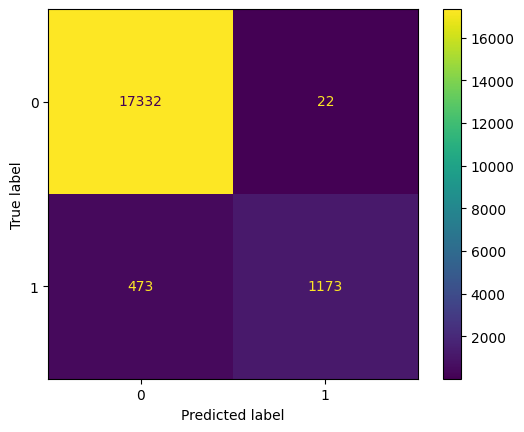

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.71      0.83      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.86      0.91     19000
weighted avg       0.97      0.97      0.97     19000



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#gradient_boost = GradientBoostingClassifier(**grid_result.best_params_).fit(x_train, y_train)
gradient_boost = GradientBoostingClassifier(**{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.8}).fit(x_train, y_train)

train_predictions = gradient_boost.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train GradientBoostingClassifier: %.2f%%" % (accuracy * 100.0))

test_predictions = gradient_boost.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test GradientBoostingClassifier: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,gradient_boost.predict(x_test)))

El modelo con parametros por defecto tiene una acurracy de 97.36 %  mientras que el modelo con los mejores parametros tiene una performance de 93.38 % en el dataset de training.

En cuanto al dataset de la competencia, el modelo por defecto tiene una acurracy de 0.97266 %, mientras que el modelo con los mejores parametros nos da un 97.333 %.

En ambos casos la performance del modelo es mejor que la base que es de 97.26 %.

Finalmente, para completar los 3 modelos pedidos, agregamos un XGBClassifier:

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()

grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_result = GridSearchCV(model,
                            grid,
                            cv=10,
                            n_jobs=-1,
                            scoring='accuracy').fit(x_train, y_train)
print('XGBClassifier')
print(grid_result.best_params_)
# Best params = {‘learning_rate’: 0.01, ‘max_depth’: 8, ‘n_estimators’: 500, ‘subsample’: 0.8}

XGBClassifier
{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 60}


Accuracy train XGBClassifier: 97.21%
Accuracy test XGBClassifier: 97.36%


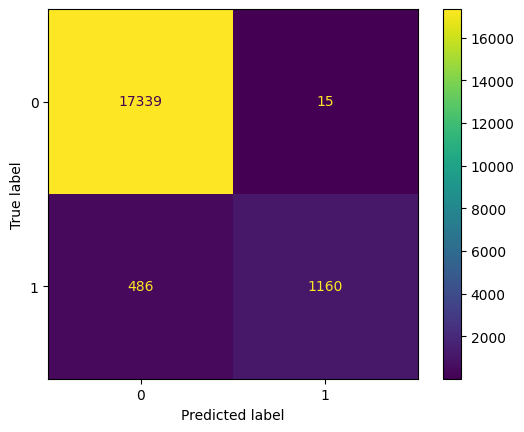

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.99      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(**grid_result.best_params_).fit(x_train, y_train)
#xgb = XGBClassifier(**{{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 60}}).fit(x_train, y_train)

train_predictions = xgb.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train XGBClassifier: %.2f%%" % (accuracy * 100.0))

test_predictions = xgb.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test XGBClassifier: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,xgb.predict(x_test)))

El modelo con parametros por defecto tiene una acurracy de 97.27 %  mientras que el modelo con los mejores parametros tiene una performance de 93.36 % en el dataset de training.

En cuanto al dataset de la competencia, el modelo por defecto tiene una acurracy de 0.97133 %, mientras que el modelo con los mejores parametros nos da un 97.333 %.

El modelo con los mejores parametros tiene una performance mejor que la base que es de 97.26 %

## Generar la salida para entregar

In [ ]:
test_df = pd.read_csv('diabetes_prediction_dataset_test.csv')


In [ ]:
test_df

,patient,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,49267,Male,53.0,0,0,never,31.99,4.5,126,NaN
1,82280,Female,22.0,0,0,never,25.96,6.6,130,NaN
2,33216,Female,37.0,0,0,never,22.24,6.2,126,NaN
3,94551,Female,29.0,0,0,not current,31.01,5.0,80,NaN
4,43760,Male,30.0,0,0,ever,28.66,6.6,100,NaN
...,...,...,...,...,...,...,...,...,...,...
4995,88540,Female,23.0,0,0,never,22.77,6.6,200,NaN
4996,26701,Female,51.0,0,0,No Info,27.32,4.0,155,NaN
4997,47271,Male,79.0,0,0,No Info,23.80,6.0,126,NaN
4998,97941,Male,24.0,0,0,never,22.68,6.1,85,NaN


Para poder evaluar nuestra predicción los datos de prueba deben tener exactamente el mismo tratamiento que los datos de entrenamiento

In [ ]:
Y_test = test_df.diabetes
PatientId_test = test_df['patient']
X_test = test_df.drop(['patient','diabetes'],axis=1,inplace=True)


In [ ]:
test_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Male,53.0,0,0,never,31.99,4.5,126
1,Female,22.0,0,0,never,25.96,6.6,130
2,Female,37.0,0,0,never,22.24,6.2,126
3,Female,29.0,0,0,not current,31.01,5.0,80
4,Male,30.0,0,0,ever,28.66,6.6,100
...,...,...,...,...,...,...,...,...
4995,Female,23.0,0,0,never,22.77,6.6,200
4996,Female,51.0,0,0,No Info,27.32,4.0,155
4997,Male,79.0,0,0,No Info,23.80,6.0,126
4998,Male,24.0,0,0,never,22.68,6.1,85


In [ ]:
X_test = test_df

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(X_test[['gender', 'smoking_history']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['gender', 'smoking_history']))
X_test.drop(['gender', 'smoking_history'], axis=1,inplace=True)
X_test = pd.concat([X_test, encoded_df], axis=1)
X_test

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,53.0,0,0,31.99,4.5,126,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,22.0,0,0,25.96,6.6,130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37.0,0,0,22.24,6.2,126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,29.0,0,0,31.01,5.0,80,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30.0,0,0,28.66,6.6,100,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,23.0,0,0,22.77,6.6,200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,51.0,0,0,27.32,4.0,155,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4997,79.0,0,0,23.80,6.0,126,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4998,24.0,0,0,22.68,6.1,85,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
cols = X_test.columns
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=cols)

In [ ]:
X_test

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,1.216115,0.534851,-0.275614,-0.200374,0.989602,0.683720,-0.950085,-0.294803
1,-0.819565,-0.840774,-0.275614,-0.200374,0.989602,-0.198857,0.997153,-0.195048
2,-0.819565,-0.175149,-0.275614,-0.200374,0.989602,-0.743333,0.626250,-0.294803
3,-0.819565,-0.530149,-0.275614,-0.200374,1.517446,0.540283,-0.486457,-1.441995
4,1.216115,-0.485774,-0.275614,-0.200374,-0.066086,0.196327,0.997153,-0.943216
...,...,...,...,...,...,...,...,...
4995,-0.819565,-0.796399,-0.275614,-0.200374,0.989602,-0.665760,0.997153,1.550679
4996,-0.819565,0.446101,-0.275614,-0.200374,-1.121774,0.000198,-1.413713,0.428426
4997,1.216115,1.688601,-0.275614,-0.200374,-1.121774,-0.515004,0.440799,-0.294803
4998,1.216115,-0.752024,-0.275614,-0.200374,0.989602,-0.678933,0.533525,-1.317300


Generamos la salida

In [ ]:
test_id = PatientId_test

ada_boost_test_predictions = ada_boost.predict(X_test)
ada_boost_test_pred = np.int64(ada_boost_test_predictions)

gradient_boost_test_predictions = gradient_boost.predict(X_test)
gradient_boost_test_pred = np.int64(gradient_boost_test_predictions)

ada_boost_default_predictions = ada_boost_default.predict(X_test)
ada_boost_default_test_pred = np.int64(ada_boost_default_predictions)

xgb_test_predictions = xgb.predict(X_test)
xgb_test_pred = np.int64(xgb_test_predictions)


Con el resultado predicho tenemos que generar el archivo `.csv` para subir a la competencia de kaggle:

In [ ]:
from google.colab import files

submission = pd.DataFrame(list(zip(test_id, ada_boost_test_predictions)), columns=["patient", "diabetes"])
submission.to_csv("AdaBoostClassifier.csv", header=True, index=False)
files.download('AdaBoostClassifier.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
submission = pd.DataFrame(list(zip(test_id, gradient_boost_test_predictions)), columns=["patient", "diabetes"])
submission.to_csv("AdaBoostClassifierDefault.csv", header=True, index=False)
files.download('AdaBoostClassifierDefault.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
submission = pd.DataFrame(list(zip(test_id, gradient_boost_test_predictions)), columns=["patient", "diabetes"])
submission.to_csv("GradientBoostClassifier.csv", header=True, index=False)
files.download('GradientBoostClassifier.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

submission = pd.DataFrame(list(zip(test_id, xgb_test_pred)), columns=["patient", "diabetes"])
submission.to_csv("XGBClassifier.csv", header=True, index=False)
files.download('XGBClassifier.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusiones

Pudimos generar 3 especificaciones de modelos que lograron superar el score del baseline: un AdaBoostClassifier, un GradientBoostClassifier y un XGBClassifier. Probamos muchos más modelos de los mencionados, pero la mayoría resultaron en una accuracy menor o igual. Por ejemplo, con un Random Forest igualamos el score del baseline. Los parámetros para ese caso fueron los siguientes:

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 400}